In [1]:
#make interact plot ==> displaying plot in a separate window
# %matplotlib # interative == open in separate window
import matplotlib.pylab as plt

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
# load data from https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales
csv_filename = 'IceCreamSales_temperatures.csv' # changed column header title
df = pd.read_csv(csv_filename)
df

,Day-Temperature,Ice-Cream-Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [4]:
# view columns and info
print(df.columns)
print(df.describe())

#Day-Temperature,Ice-Cream-Profits

Index(['Day-Temperature', 'Ice-Cream-Profits'], dtype='object')
       Day-Temperature  Ice-Cream-Profits
count       365.000000         365.000000
mean         71.980822          52.103616
std          13.258510          15.989004
min          39.000000          11.880000
25%          63.000000          40.650000
50%          73.000000          53.620000
75%          82.000000          63.630000
max         101.000000          89.290000


In [5]:
# prepare and cleaning data before training
# NOTE:
# in Machine Learning, many times are spent to prepare and clean data.
# but in this sample data, there is no data cleaning required.

Text(0, 0.5, 'Ice Create Sales Profit')

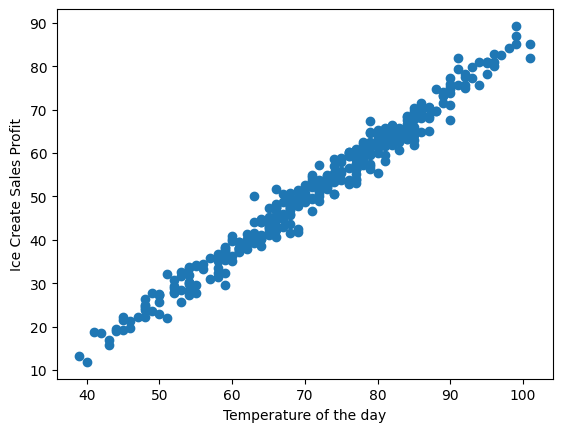

In [47]:
# see all column names!
df.columns

# visualize in 2D
plt.scatter(df['Day-Temperature'], df['Ice-Cream-Profits'])
plt.xlabel('Temperature of the day')
plt.ylabel('Ice Create Sales Profit')


In [7]:
# define X ==> data to train (independent) and y ==> the target (dependent, annotated)

# X is all columns except the last column (right side)
X = df.drop(df.columns[-1], axis=1) # numpy.ndarray

# y is a column on most right side.
y = df.take([-1], axis=1)

# Split data into data for training (to make model) and data for testing (to predict)
# Q: WHY do splitting data?
# A: Splitting the data allows us to evaluate the performance of the model on data that it hasn't seen during training.
#    This helps assess how well the model generalizes to new, unseen data.

# NOTE: minimum data count is 15, for testing 0.2 (20%) is enough, it means 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# see total X_train and X_test
X_train.shape[0], X_test.shape[0]


(292, 73)

In [8]:
# create model
modelLR = LinearRegression()

# fit == train
modelLR.fit(X_train.values, y_train.values) # use .values (do not take header text, because next predict data has no header)

LinearRegression()

In [9]:
# show the Coefficient and Intercept value
print(f"***\n{modelLR.coef_ = }\n{modelLR.intercept_ = }\n***")

***
modelLR.coef_ = array([[1.19795149]])
modelLR.intercept_ = array([-34.1367017])
***


In [31]:
# test predict using original train data to see the R2 score
y_pred_of_train = modelLR.predict(X_train.values) # when predict, only use .values (without header text)

# display result
data = pd.DataFrame()
data['day-temperature'] = X_train
data['ice cream profit'] = y_train
data['predicted profit'] = np.round(y_pred_of_train, decimals=2)
data 


,day-temperature,ice cream profit,predicted profit
265,81,65.86,62.90
141,68,47.47,47.32
182,73,55.01,53.31
221,77,56.43,58.11
35,53,31.62,29.35
...,...,...,...
299,84,68.54,66.49
22,50,22.89,25.76
72,60,39.69,37.74
15,48,24.68,23.36


In [40]:
"""
Learning point:

Regression in Machine Learning is to predict a continuous value based on input feature,
to predict any value we need to know the "Coefficient(s)" and "Intercept" values,
after we knew the Coefficient and Intercept values then 
we can make manually make prediction using math formula:

In a single feature, like in this test case, the formula is
y = (Coefficient * X) + Intercept
"""

def predict_manually(X, Coefficient, Intercept):
    y = (X * Coefficient) + Intercept
    return y 

def print_manual_prediction(arr):
    for i in arr:
        y = predict_manually(i, modelLR.coef_[0], modelLR.intercept_)
        print(f"{i} = {np.round(y, decimals=2)}")

print_manual_prediction([81,68,48,72])

"""
NOTE:
This is a regression prediction which mean the predicted value (output) may not be accurate 1:1 as the learning data,
therefore even if we use the same value from training data, the output maybe different.
"""



81 = [62.9]
68 = [47.32]
48 = [23.36]
72 = [52.12]


'\nNOTE:\nThis is a regression prediction which mean the predicted value (output) may not be accurate 1:1 as the learning data,\ntherefore even if we use the same value from training data, the output maybe different.\n'

In [46]:
"""
How to evaluate if our created (trained) model has high performance/accuracy?

Use R-squared (coefficient of determination) score, it is a useful metric for evaluating the performance of regression models.

The r2_score() function in scikit-learn (also known as the coefficient of determination) 
is a metric used to evaluate the performance of regression models.
It quantifies the proportion of the variance in the target variable that is predictable from the input features.

r2_score() output value is ranging from 1.0 to negative value
a score of 1.0 is a perfect match (highest) score
"""

# example to understand r2_score()
print(f"1 = {r2_score([1,2,3], [4,5,6])}") # far from close
print(f"2 = {r2_score([1,2,3], [2,3,1])}") # also bad == same values but different sequence
print(f"3 = {r2_score([1,2,3], [0.9, 2.5, 2.8])}") # close
print(f"4 = {r2_score([1,2,3], [1,2,3])}") # perfect math

# how accurate is the model?
print(f"train data score = {r2_score(y_train, y_pred_of_train)}") 

1 = -12.5
2 = -2.0
3 = 0.85
4 = 1.0
train data score = 0.9757597533262407


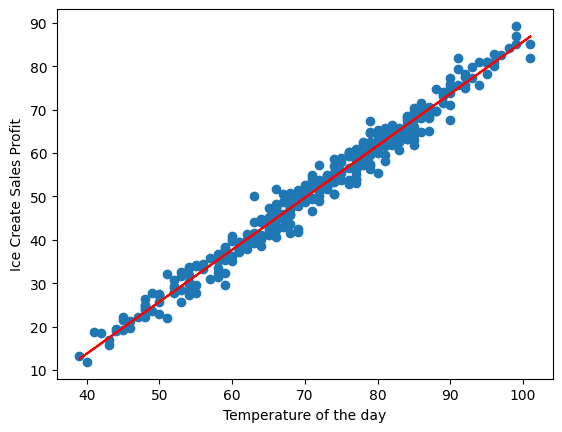

In [48]:
# visualize the predicted data
plt.scatter(df['Day-Temperature'], df['Ice-Cream-Profits'])
plt.xlabel('Temperature of the day')
plt.ylabel('Ice Create Sales Profit')
plt.plot(X_train, y_pred_of_train, label='Pred training data', color='red')

In [35]:
# now predict using the test data
y_pred_of_test = modelLR.predict(X_test.values) # when predict, only use .values (without header text)

# display result (remove decimal points - round down)
y_pred_of_test.astype(int)


array([[36],
       [53],
       [58],
       [49],
       [66],
       [25],
       [42],
       [46],
       [54],
       [60],
       [36],
       [18],
       [25],
       [68],
       [36],
       [77],
       [41],
       [50],
       [68],
       [24],
       [86],
       [53],
       [37],
       [73],
       [44],
       [36],
       [59],
       [58],
       [46],
       [44],
       [72],
       [56],
       [40],
       [76],
       [37],
       [47],
       [50],
       [49],
       [48],
       [64],
       [46],
       [80],
       [23],
       [56],
       [28],
       [42],
       [52],
       [54],
       [49],
       [48],
       [55],
       [16],
       [35],
       [67],
       [65],
       [56],
       [58],
       [58],
       [60],
       [82],
       [38],
       [59],
       [73],
       [42],
       [67],
       [62],
       [54],
       [20],
       [22],
       [50],
       [48],
       [79],
       [28]])

In [36]:
# compare accuracy 
print(f"R-square score of training data = {r2_score(y_train, y_pred_of_train)}")
print(f"R-square score of testing data = {r2_score(y_test, y_pred_of_test)}")

R-square score of training data = 0.9757597533262407
R-square score of testing data = 0.98173950601214


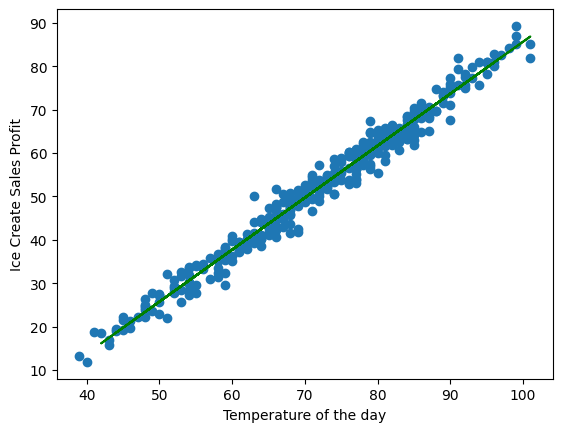

In [49]:
# visualize the predicted data
plt.scatter(df['Day-Temperature'], df['Ice-Cream-Profits'])
plt.xlabel('Temperature of the day')
plt.ylabel('Ice Create Sales Profit')
#plt.plot(X_train, y_pred_of_train, label='Pred training data', color='red')
plt.plot(X_test, y_pred_of_test, label='Pred testing data', color='green')

In [24]:
"""
This Ice Cream Sales data is very linear, it is a good sample to demo Linear Regression.

The y_test ("testing data", unseen data) is not included in the X_train ("training data"), 
but the formula from trained model can predict this unseen data accurately as well.

In this data, both "training data" and "testing data" can be predicted with very high accuracy (>= 0.97).
"""

'\nThis Ice Cream Sales data is very linear, therefore using simple Linear Regression is enough.\n\nThe "training data" and "testing data" both can be predicted with very high accuracy (>= 0.97).\n'

In [38]:
"""
EXTRA learning point.
----------------------

Other than R-square score, we can use Mean Absolute Error (MAE)

The value range is from 0 to positive infinity,
the lower the value, the better the accuracy (less error)
a value closer to 0.0 is perfect match.

usage:
mean_absolute_error(true case, predicted case)
"""
from sklearn.metrics import mean_absolute_error

print(f"MAE of training data = {mean_absolute_error(y_train, y_pred_of_train)}")
print(f"MAE of testing data = {mean_absolute_error(y_test, y_pred_of_test)}")

MAE of training data = 1.9505221401191828
MAE of testing data = 1.7011920953717636


In [39]:
"""
Other MAE, we also can use MSE (Mean Squared Error)

Why use MSE?
MSE is more sensitive to "outlier" (= data point that significantly deviates from the rest of the data)
so to find "outlier" we can use MSE (because higher value) instead of MAE

usage:
mean_squared_error(true case, predicted case)
"""
from sklearn.metrics import mean_squared_error
print(f"MSE of training data = {mean_squared_error(y_train, y_pred_of_train)}")
print(f"MSE of testing data = {mean_squared_error(y_test, y_pred_of_test)}")

MSE of training data = 6.152139770850768
MSE of testing data = 4.710178224513855
